In [2]:
import pandas as pd
import scipy as sp
import numpy as np

import emcee
from multiprocessing import Pool

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from cycler import cycler
import corner
from typing import Any, Dict, List, Optional, Tuple, Union
import itertools

import lymph

### Setup System


In [3]:
filename = "../data/extended_system.hdf5"

extended_systm = lymph.utils.system_from_hdf(
    filename=filename,
    name="extended/model")



samples_HMM = emcee.backends.HDFBackend(filename=filename, name="extended/samples").get_chain(flat=True, discard=7000)

spread_probs = samples_HMM[:, -1]
late_p = samples_HMM[:, :-1]


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


Loading patients of early T-stage


100%|██████████| 20864/20864 [01:18<00:00, 265.99it/s]


Loading patients of late T-stage


100%|██████████| 14336/14336 [00:53<00:00, 266.49it/s]


<Figure size 720x432 with 0 Axes>

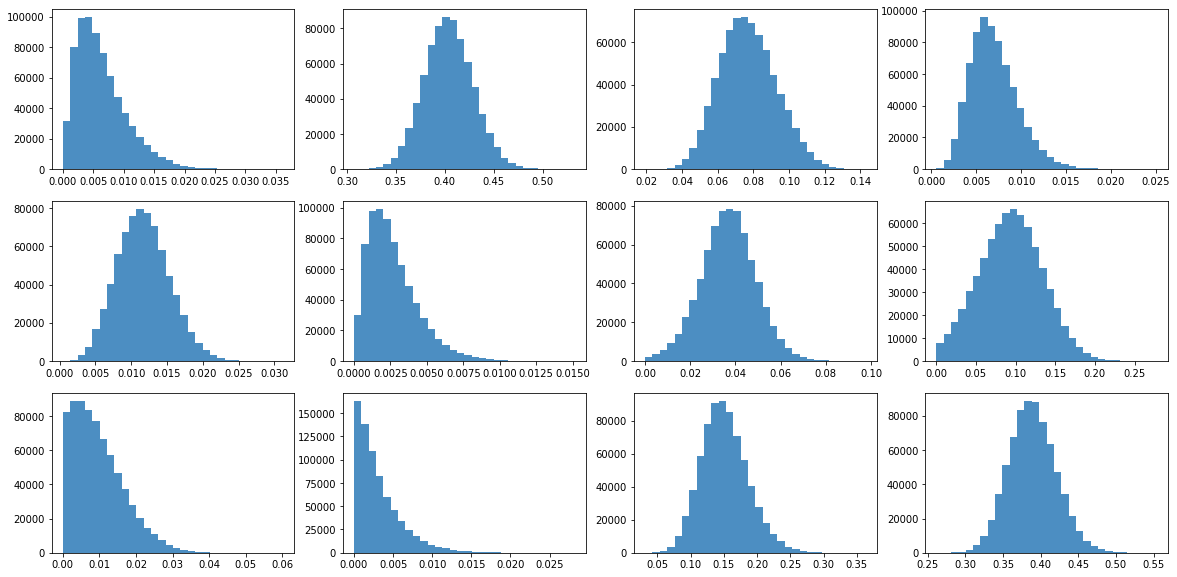

In [9]:
plt.figure(figsize = (10, 6)) 
usz_blue = '#005ea8'
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(20,10)
for i in range(12):
    y = i % 4
    x = i // 4
    axs[x, y].hist(samples_HMM[:, i], bins = 30, alpha = 0.7, color= usz_blue)

